AttributeError: 'list' object has no attribute 'set_data'

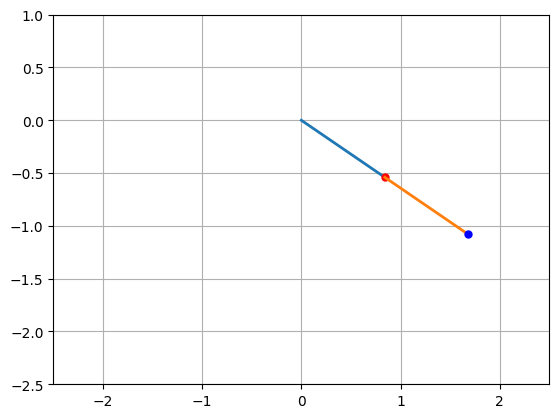

In [4]:
import numpy as np
from scipy.integrate import odeint
import sympy as sp
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

t = sp.symbols('t')
m_1, m_2, g = sp.symbols('m_1 m_2 g', positive=True) 
the1, the2 = sp.symbols(r'\theta_1, \theta_2', cls=sp.Function) # Position is a function 

the1 = the1(t)
the2 = the2(t) # Position is a function of time

x1 = sp.sin(the1)
y1 = -sp.cos(the1)

x2 = x1 + sp.sin(the2)
y2 = y1 + -sp.cos(the2)

# Calculate derivatives: 1st diff: angular velocity
# 2nd diff: angular acceleration

the1_d = sp.diff(the1,t)
the1_d2 = sp.diff(the1_d,t)
x1_d = sp.diff(x1,t)
y1_d = sp.diff(y1,t)
the2_d = sp.diff(the2,t)
the2_d2 = sp.diff(the2_d,t)
x2_d = sp.diff(x2,t)
y2_d = sp.diff(y2,t)

# Defining Lagrangian for two masses (Kinetic and potential energies)

T_1 = 1/2 * m_1 * ((x1_d)**2 + (y1_d)**2)
T_2 = 1/2 * m_2 * ((x2_d)**2 + (y2_d)**2)

V_1 = m_1 * g * y1
V_2 = m_2 * g * y2

L = T_1 + T_2 - (V_2 + V_1) # L = T - V 

# Formulating Euler - Lagrange's Equation, assuming no damping

LE1 = sp.diff(sp.diff(L, the1_d), t) - sp.diff(L, the1)
LE2 = sp.diff(sp.diff(L, the2_d), t) - sp.diff(L, the2)

LE1 = LE1.simplify()
LE2 = LE2.simplify()

solutions = sp.solve([LE1, LE2], the1_d2, the2_d2)
LEF1 = sp.lambdify((the1, the2, the1_d, the2_d, t, m_1, m_2, g), solutions[the1_d2])
LEF2 = sp.lambdify((the1, the2, the1_d, the2_d, t, m_1, m_2, g), solutions[the2_d2])

# Initial conditions + Constants

iniCond = [1.0, 0.0, 1.0, 0.0] # theta_1, v_1, theta_2, v_2
m1_val = 4
m2_val = 4
gVal = 1.68 # Can use g = 9.81ms^-2, not G -> Newton's Constant

# Describing the system of 2nd order nonlinear ODEs

def system_of_odes(y, t, m_1, m_2, g):
    the1, the1_d, the2, the2_d = y
    the1_d2 = LEF1(the1, the2, the1_d, the2_d, t, m_1, m_2, g)
    the2_d2 = LEF2(the1, the2, the1_d, the2_d, t, m_1, m_2, g)

    return [the1_d, the1_d2, the2_d, the2_d2]

# Time frame for numerical sol.

timePoints = np.linspace(0, 40, 1001)

# Solve system of ODEs

solution = odeint(system_of_odes, iniCond, timePoints, args=(m1_val, m2_val, gVal))

# Position and angular vel. from sol.

the1_sol = solution[:,0]
the1_d_sol = solution[:,1]

the2_sol = solution[:,2]
the2_d_sol = solution[:,3]

x1_pendulum = np.sin(the1_sol)
y1_pendulum = -np.cos(the1_sol)

x2_pendulum = x1_pendulum + np.sin(the2_sol)
y2_pendulum = y1_pendulum + -np.cos(the2_sol)

# Graphical representation of pendula

def update(frame):
    pendulum1.set_data([0, x1_pendulum[frame]], [0, y1_pendulum[frame]])
    mass1.set_data([x1_pendulum[frame]], [y1_pendulum[frame]])

    pendulum2.set_data([x1_pendulum[frame], x2_pendulum[frame]], [y1_pendulum[frame], y2_pendulum[frame]])
    mass2.set_data([x2_pendulum[frame]], [y2_pendulum[frame]])
    return pendulum1, mass1, pendulum2, mass2

fig, ax = plt.subplots()
ax.set_xlim(-2.5,2.5)
ax.set_ylim(-2.5,1)
plt.grid()

pendulum1, = ax.plot([0, x1_pendulum[0]], [0, y1_pendulum[0]], lw=2)
mass1, = ax.plot([x1_pendulum[0]], [y1_pendulum[0]], 'o', markersize=4*int(m1_val)+1, color='red') 
pendulum2, = ax.plot([x1_pendulum[0], x2_pendulum[0]], [y1_pendulum[0], y2_pendulum[0]], lw=2)
mass2, = ax.plot([x2_pendulum[0]], [y2_pendulum[0]], 'o', markersize=4*int(m1_val)+1, color='blue')


animation = FuncAnimation(fig, update, frames=len(timePoints), interval=25, blit=True)


plt.show()








